문제 정의: 전국에서 아름동의 연령별 인구 구조와 가장 형태가 비슷한 지역은 어디일까?

<알고리즘 설계> <br>
1. 데이터를 읽어온다.
2. 궁금한 지역의 이름을 입력 받는다.
3. 궁금한 지역의 인구 구조를 저장한다.
4. 궁금한 지역의 인구 구조와 가장 비슷한 인구 구조를 가진 지역을 찾는다.
5. 가장 비슷한 곳의 인구 구조와 궁금한 지역의 인구 구조를 시각화 한다.


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
import csv
f = open('age.csv',encoding='cp949')

data = csv.reader(f)
next(data) # 헤더 제거

for row in data:
  print(row)

궁금한 지역의 이름을 입력 받는다

In [ ]:
import csv
f = open('age.csv',encoding='cp949')

data = csv.reader(f)
next(data)

home = []
name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요: ')

for row in data:
  if name in row[0]:
    for i in row[3:]:
      home.append(int(i.replace(',','')))

print(home)

인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요: 아름동
[248, 320, 354, 405, 399, 393, 465, 510, 545, 473, 526, 513, 489, 448, 451, 433, 349, 376, 332, 262, 212, 190, 186, 160, 184, 152, 160, 175, 176, 178, 179, 246, 247, 297, 354, 427, 535, 565, 629, 660, 587, 646, 680, 648, 648, 662, 559, 558, 487, 400, 378, 299, 282, 200, 207, 167, 178, 217, 161, 163, 147, 139, 121, 130, 110, 79, 97, 74, 59, 82, 68, 51, 49, 48, 27, 26, 42, 36, 21, 23, 35, 20, 31, 19, 23, 10, 12, 6, 6, 13, 9, 8, 5, 7, 3, 2, 2, 1, 1, 1, 0]


3. 궁금한 지역의 인구 구조를 저장한다

In [ ]:
import csv
import numpy as np

f = open('age.csv',encoding='cp949')

data = csv.reader(f)
next(data)

name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요.: ')

for row in data:
  if name in row[0]:
    home = np.array(row[3:],dtype = int)

print(home)

인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요.: 아름동
[248 320 354 405 399 393 465 510 545 473 526 513 489 448 451 433 349 376
 332 262 212 190 186 160 184 152 160 175 176 178 179 246 247 297 354 427
 535 565 629 660 587 646 680 648 648 662 559 558 487 400 378 299 282 200
 207 167 178 217 161 163 147 139 121 130 110  79  97  74  59  82  68  51
  49  48  27  26  42  36  21  23  35  20  31  19  23  10  12   6   6  13
   9   8   5   7   3   2   2   1   1   1   0]


인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요.: 아름동


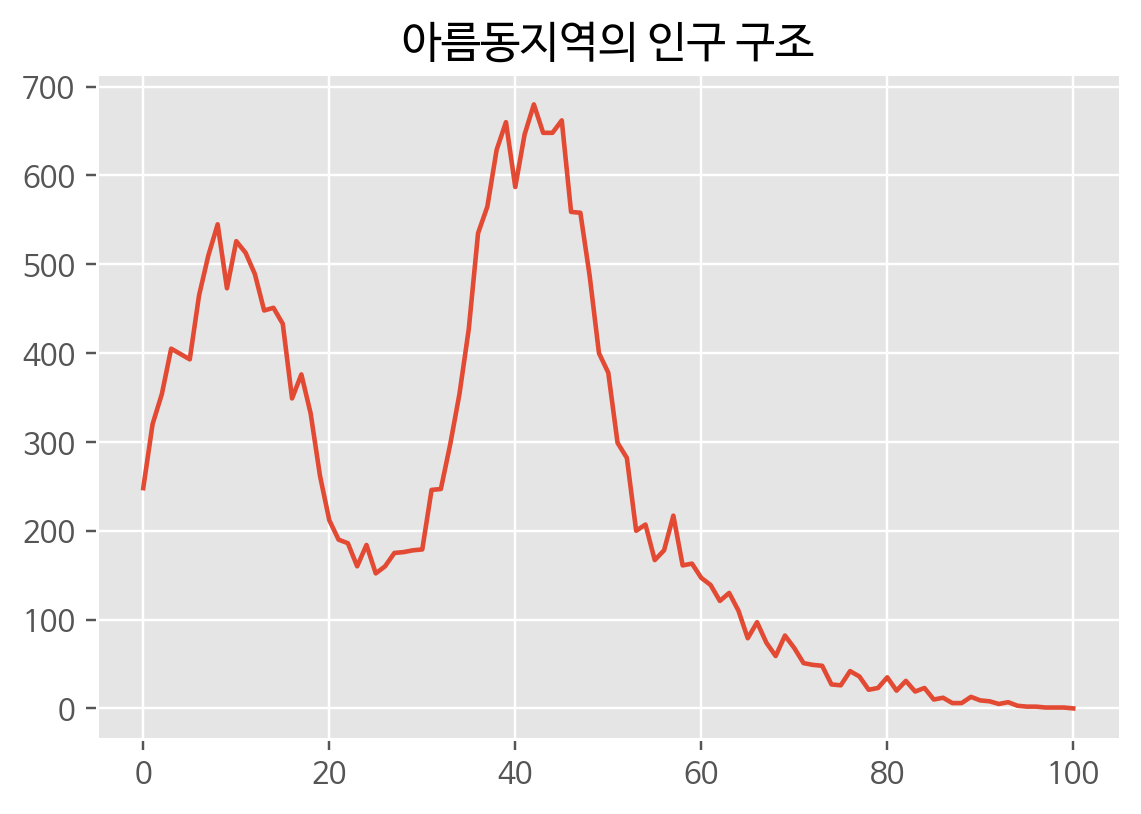

In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt

f = open('age.csv',encoding='cp949')

data = csv.reader(f)
next(data)

name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요.: ')

for row in data:
  if name in row[0]:
    home = np.array(row[3:],dtype = int)

# 데이터 시각화
plt.style.use('ggplot')
plt.rc('font',family='NanumBarunGothic')
plt.figure(dpi = 110)
plt.title(name + '지역의 인구 구조')

plt.plot(home)
plt.show()

4. 궁금한 지역의 인구 구조와 가장 비슷한 인구 구조를 가진 지역을 찾는다.


*   전국의 모든 지역 중 한곳 (B)을 선택 한다.
*   궁금한 지역 A의 0세 인구수에서 B의 0세 인구수를 뺀다
*   100세 이상 인구수에 해당 하는 값까지 반복한 후 각각의 차이를 모두 더한다.
*   전국의 모든 지역에 대해 반복하며, 그 차이가 가장 작은 지역을 찾는다.

궁금한 지역 A의 0세 인구 비율에서 B의 0세 인구 비율을 뺀다.
 

In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt

f = open('age.csv',encoding='cp949')

data = csv.reader(f)
next(data) # 헤더 제거

data = list(data) # 추가

name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요.: ')



for row in data:
  if name in row[0]:
    home = np.array(row[3:],dtype = int) / int(row[2])

for row in data:
    away = np.array(row[3:],dtype = int) / int(row[2])
    print(np.sum(home-away)) # numpy.sum() 함수를 이용하여 각각의 차이 모두 더함


전국의 모든 지역에 대해 반복하여 그 차이가 가장 작은 지역을 찾고 시각화


인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요.: 신도림동


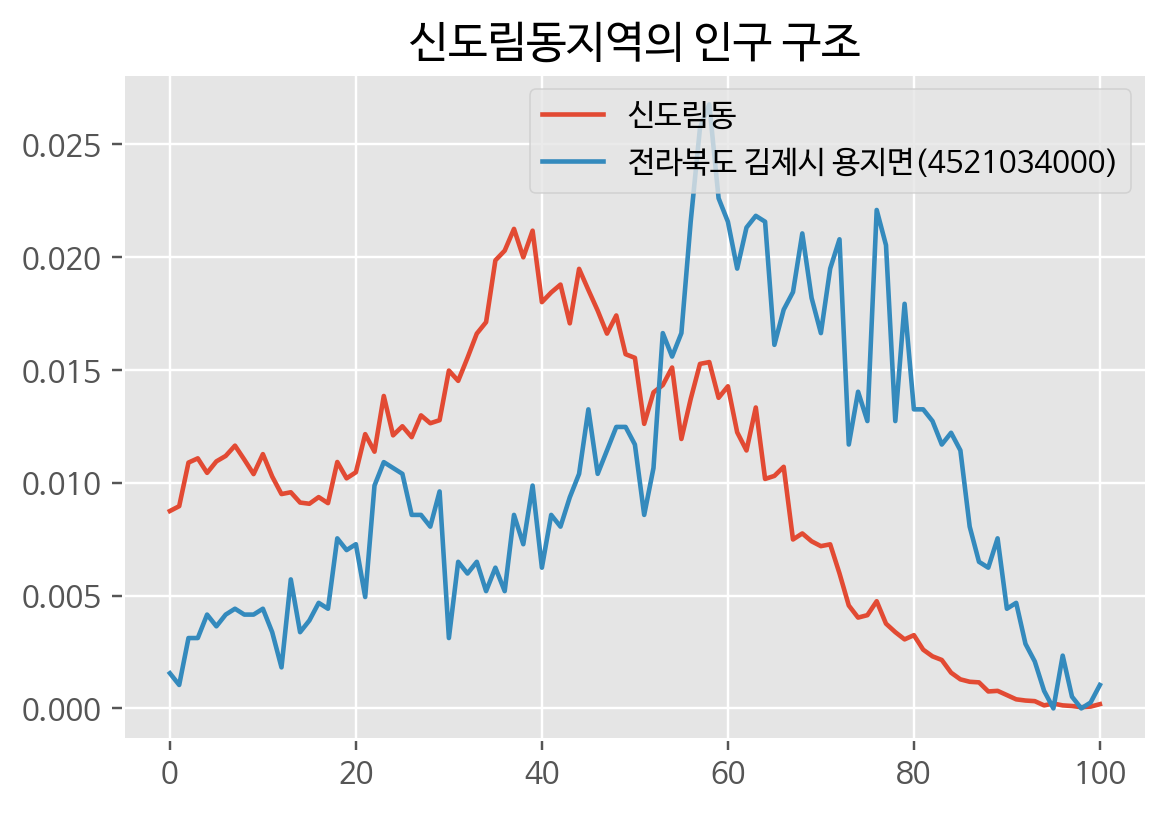

In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt

f = open('age.csv',encoding='cp949')

data = csv.reader(f)
next(data) # 헤더 제거

data = list(data) # 추가

name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요.: ')

mn = 1 # 최솟값을 저장할 변수 생성 및 초기화
result_name = '' # 최소값을 갖는 지역의 이름 저장할 변수 생성 및 초기화
result = 0 # 최소값을 갖는 지역의 연령대별 인구 비율 저장 할 변수 생성 및 초기화

for row in data:
  if name in row[0]:
    home = np.array(row[3:],dtype = int) / int(row[2])

for row in data:
    away = np.array(row[3:],dtype = int) / int(row[2])
    s = np.sum(home - away)
    if s < mn:
      mn = s
      result_name = row[0]
      result = away # 인구 비율 저장


# 데이터 시각화
plt.style.use('ggplot')
plt.rc('font',family='NanumBarunGothic')
plt.figure(dpi = 110)
plt.title(name + '지역의 인구 구조')
plt.plot(home, label = name)
plt.plot(result, label = result_name)
plt.legend()
plt.show()

우리가 찾고 있었던 것은 인구 구조가 가장 비슷한 지역 -> 즉 연령대별 인구 비율과 분포가 비슷해야 함<br>
두 지역의 차이가 합한 값이 0에 가까울 수록 인구 구조가 비슷 -> 음수 값이 선택됨<br>
거듭제곱 연산자를 통해 음수를 양수로 변환 처리 추가


인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요.: 조치원읍


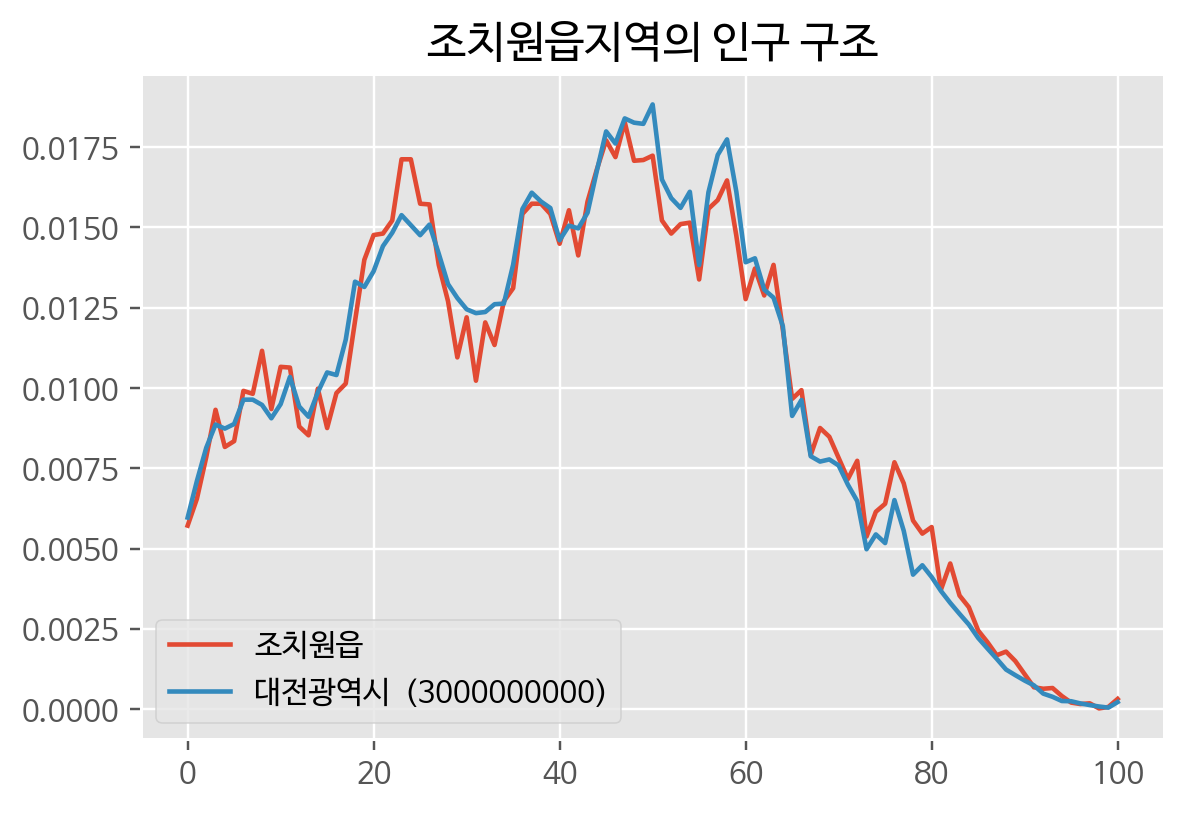

In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt

f = open('age.csv',encoding='cp949')

data = csv.reader(f)
next(data) # 헤더 제거

data = list(data) # 추가

name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요.: ')

mn = 1 # 최솟값을 저장할 변수 생성 및 초기화
result_name = '' # 최소값을 갖는 지역의 이름 저장할 변수 생성 및 초기화
result = 0 # 최소값을 갖는 지역의 연령대별 인구 비율 저장 할 변수 생성 및 초기화

for row in data:
  if name in row[0]:
    home = np.array(row[3:],dtype = int) / int(row[2])

for row in data:
    away = np.array(row[3:],dtype = int) / int(row[2])
    s = np.sum((home - away)**2) # 음수 -> 양수로 변환 
    if s < mn and name not in row[0]:
      mn = s
      result_name = row[0]
      result = away # 인구 비율 저장


# 데이터 시각화
plt.style.use('ggplot')
plt.rc('font',family='NanumBarunGothic')
plt.figure(dpi = 110)
plt.title(name + '지역의 인구 구조')
plt.plot(home, label = name)
plt.plot(result, label = result_name)
plt.legend()
plt.show()